In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import f1_score, accuracy_score


# ac50 = pd.read_csv('D:/NEU/ALY6980/AC50.csv')
# drug = pd.read_csv('D:/NEU/ALY6980/drugcode.csv')
ac50 = pd.read_csv('AC50.csv')
drug = pd.read_csv('drugcode.csv')

In [2]:
ac50.head(3)

,Unnamed: 0,ACEA_AR_agonist_80hr,ACEA_AR_agonist_AUC_viability,ACEA_AR_antagonist_80hr,ACEA_AR_antagonist_AUC_viability,ACEA_ER_80hr,ACEA_ER_AUC_viability,APR_Cell_count_1_24hr_dn,APR_Cell_count_1_24hr_up,APR_Cell_count_1_72hr_dn,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,C100005,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,NaN,NaN,NaN,...,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0
1,C1000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C10001135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
drug.head(4)

,Classification,Code
0,AmbiDILIDrugs,C4291638
1,AmbiDILIDrugs,C64868
2,MostDILI Drugs,C97778
3,AmbiDILIDrugs,C53167


In [4]:
ac50.rename(columns={'Unnamed: 0': 'drugcode'}, inplace=True)
ac50.head(2)



,drugcode,ACEA_AR_agonist_80hr,ACEA_AR_agonist_AUC_viability,ACEA_AR_antagonist_80hr,ACEA_AR_antagonist_AUC_viability,ACEA_ER_80hr,ACEA_ER_AUC_viability,APR_Cell_count_1_24hr_dn,APR_Cell_count_1_24hr_up,APR_Cell_count_1_72hr_dn,...,Tanguay_ZF_120hpf_OTIC_up,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up
0,C100005,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,NaN,NaN,NaN,...,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0
1,C1000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
drug.rename(columns={'Code': 'drugcode'}, inplace=True)
drug.head(3)

,Classification,drugcode
0,AmbiDILIDrugs,C4291638
1,AmbiDILIDrugs,C64868
2,MostDILI Drugs,C97778


In [47]:
data = pd.merge(ac50, drug,on='drugcode',how='inner')
data.shape

(1636, 1401)

In [7]:
data.head(40)

,drugcode,ACEA_AR_agonist_80hr,ACEA_AR_agonist_AUC_viability,ACEA_AR_antagonist_80hr,ACEA_AR_antagonist_AUC_viability,ACEA_ER_80hr,ACEA_ER_AUC_viability,APR_Cell_count_1_24hr_dn,APR_Cell_count_1_24hr_up,APR_Cell_count_1_72hr_dn,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,Classification
0,C102625707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LessDILIDrugs
1,C103577453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LessDILIDrugs
2,C103577453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LessDILIDrugs
3,C103577453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LessDILIDrugs
4,C103577453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LessDILIDrugs
5,C103577453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LessDILIDrugs
6,C103902,1000000.0,1000000.0,1000000.000000,1000000.0,1000000.000000,1000000.000000,NaN,NaN,NaN,...,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,MostDILI Drugs
7,C103902,1000000.0,1000000.0,1000000.000000,1000000.0,1000000.000000,1000000.000000,NaN,NaN,NaN,...,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,MostDILI Drugs
8,C103902,1000000.0,1000000.0,1000000.000000,1000000.0,1000000.000000,1000000.000000,NaN,NaN,NaN,...,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,MostDILI Drugs
9,C103902,1000000.0,1000000.0,1000000.000000,1000000.0,1000000.000000,1000000.000000,NaN,NaN,NaN,...,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,MostDILI Drugs


In [48]:
#remove ambi drugs
# Get names of indexes for which column classification has value ambidilidrug
indexNames = data[data['Classification'] == "AmbiDILIDrugs" ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [49]:
data.shape

(1461, 1401)

In [50]:
# remove duplicates
# sorting by drugcode
data.sort_values("drugcode", inplace = True) 

# dropping ALL duplicte values 
data.drop_duplicates(subset ="drugcode", 
                     keep = False, inplace = True) 

In [51]:
# after remove duplicate drugs 
data.shape

(43, 1401)

In [57]:
cols = data.isnull().sum()
cols

drugcode                             0
ACEA_AR_agonist_80hr                35
ACEA_AR_agonist_AUC_viability       35
ACEA_AR_antagonist_80hr             35
ACEA_AR_antagonist_AUC_viability    35
ACEA_ER_80hr                        31
ACEA_ER_AUC_viability               31
APR_Cell_count_1_24hr_dn            43
APR_Cell_count_1_24hr_up            43
APR_Cell_count_1_72hr_dn            43
APR_Cell_count_1_72hr_up            43
APR_Cell_count_2_24hr_dn            43
APR_Cell_count_2_24hr_up            43
APR_Cell_count_2_72hr_dn            43
APR_Cell_count_2_72hr_up            43
APR_Cell_cycle_arrest_1_24hr_dn     43
APR_Cell_cycle_arrest_1_24hr_up     43
APR_Cell_cycle_arrest_1_72hr_dn     43
APR_Cell_cycle_arrest_1_72hr_up     43
APR_Cell_cycle_arrest_2_24hr_dn     43
APR_Cell_cycle_arrest_2_24hr_up     43
APR_Cell_cycle_arrest_2_72hr_dn     43
APR_Cell_cycle_arrest_2_72hr_up     43
APR_HepG2_CellCycleArrest_1h_dn     43
APR_HepG2_CellCycleArrest_1h_up     43
APR_HepG2_CellCycleArrest

In [67]:
#notkeep =cols[cols==1636].index
#notkeep
#data1 = data[data.columns[~data.columns.isin(notkeep)]]
#data1

# remove columns have NA values
flag = int(len(data) * 0.3)
keep=cols[cols<=flag].index
data1= data[keep]
data1 = data1.fillna(0)
data1.shape

(43, 213)

In [69]:
from matplotlib import pyplot as plt

most = data1[data1.Classification.str.contains('Most')]
others = data1[(data1.Classification.str.contains('Less')) | (data1.Classification.str.contains('No'))]

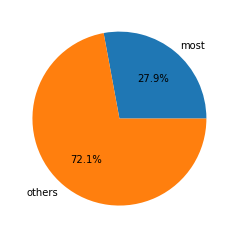

In [70]:
labels = ['most','others']
sizes = [len(most), len(others)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.show()

In [71]:
inx= data1.Classification=='MostDILI Drugs'
data1.Classification[inx] = 1
data1.Classification[~inx] = 0
data1

e:\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
e:\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,drugcode,TOX21_AP1_BLA_Agonist_ch1,TOX21_AP1_BLA_Agonist_ch2,TOX21_AP1_BLA_Agonist_ratio,TOX21_AP1_BLA_Agonist_viability,TOX21_ARE_BLA_Agonist_ch1,TOX21_ARE_BLA_Agonist_ch2,TOX21_ARE_BLA_agonist_ratio,TOX21_ARE_BLA_agonist_viability,TOX21_AR_BLA_Agonist_ch1,...,TOX21_p53_BLA_p3_viability,TOX21_p53_BLA_p4_ch1,TOX21_p53_BLA_p4_ch2,TOX21_p53_BLA_p4_ratio,TOX21_p53_BLA_p4_viability,TOX21_p53_BLA_p5_ch1,TOX21_p53_BLA_p5_ch2,TOX21_p53_BLA_p5_ratio,TOX21_p53_BLA_p5_viability,Classification
0,C102625707,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,34.319730,22.846998,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
71,C125337,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
117,C13010474,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.004587,0.004560,1000000.000000,0
125,C132605,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1
171,C144701484,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,51.516514,32.014781,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
172,C148553508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
173,C148823,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,28.084964,22.298544,1000000.000000,24.360943,22.467788,28.663456,1000000.000000,0
201,C1553602,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1
202,C15686712,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,27.092641,1000000.000000,1000000.0,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0
296,C184475352,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,4.224518,23.164092,1000000.0,...,1000000.000000,32.399605,1000000.000000,1000000.000000,37.632385,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1


In [72]:
data1['Classification'].value_counts()

0    31
1    12
Name: Classification, dtype: int64

In [73]:
data2 = data1.drop(['Classification','drugcode'],1)
inx2 = data1==1000000
data2[inx2]= 0
data2[~inx2]= 1
data2

,TOX21_AP1_BLA_Agonist_ch1,TOX21_AP1_BLA_Agonist_ch2,TOX21_AP1_BLA_Agonist_ratio,TOX21_AP1_BLA_Agonist_viability,TOX21_ARE_BLA_Agonist_ch1,TOX21_ARE_BLA_Agonist_ch2,TOX21_ARE_BLA_agonist_ratio,TOX21_ARE_BLA_agonist_viability,TOX21_AR_BLA_Agonist_ch1,TOX21_AR_BLA_Agonist_ch2,...,TOX21_p53_BLA_p3_ratio,TOX21_p53_BLA_p3_viability,TOX21_p53_BLA_p4_ch1,TOX21_p53_BLA_p4_ch2,TOX21_p53_BLA_p4_ratio,TOX21_p53_BLA_p4_viability,TOX21_p53_BLA_p5_ch1,TOX21_p53_BLA_p5_ch2,TOX21_p53_BLA_p5_ratio,TOX21_p53_BLA_p5_viability
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [74]:
data= pd.concat([data1[["Classification",'drugcode']],data2],1)
data.drugcode = preprocessing.LabelEncoder().fit_transform(data.drugcode)
#data_drugcode.head()
data.head(20)


,Classification,drugcode,TOX21_AP1_BLA_Agonist_ch1,TOX21_AP1_BLA_Agonist_ch2,TOX21_AP1_BLA_Agonist_ratio,TOX21_AP1_BLA_Agonist_viability,TOX21_ARE_BLA_Agonist_ch1,TOX21_ARE_BLA_Agonist_ch2,TOX21_ARE_BLA_agonist_ratio,TOX21_ARE_BLA_agonist_viability,...,TOX21_p53_BLA_p3_ratio,TOX21_p53_BLA_p3_viability,TOX21_p53_BLA_p4_ch1,TOX21_p53_BLA_p4_ch2,TOX21_p53_BLA_p4_ratio,TOX21_p53_BLA_p4_viability,TOX21_p53_BLA_p5_ch1,TOX21_p53_BLA_p5_ch2,TOX21_p53_BLA_p5_ratio,TOX21_p53_BLA_p5_viability
0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
125,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,0,4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
172,0,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
201,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0,8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,1,9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [75]:
# convert data types
for i in range(81):
    data.iloc[:,i]= pd.to_numeric(data.iloc[:,i])

In [76]:
# model 
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Classification"],1),data['Classification'], test_size=0.3)

rf= RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=1,verbose=1)
rf.fit(X_train,y_train)
predict = rf.predict(X_test)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


In [77]:
accuracy_score(y_test, predict)

0.8461538461538461

In [78]:
f1_score(y_test, predict)

0.6666666666666666

In [97]:
# top 5 of the most important features

top_5 = np.argsort(rf.feature_importances_)[::-1][:5]
data = data.drop(["Classification", 'drugcode'], axis=1)
data.columns[top_5]

Index(['TOX21_AP1_BLA_Agonist_ch1', 'TOX21_ERb_BLA_Antagonist_ch1',
       'TOX21_H2AX_HTRF_CHO_viability', 'TOX21_ELG1_LUC_Agonist',
       'TOX21_VDR_BLA_Antagonist_ch1'],
      dtype='object')

Index(['drugcode', 'TOX21_ERb_BLA_Agonist_viability',
       'TOX21_H2AX_HTRF_CHO_Agonist_ratio', 'TOX21_DT40_657',
       'TOX21_VDR_BLA_Agonist_viability'],
      dtype='object')

In [166]:
#fpr, tpr, thresholds = roc_curve(y_test-1, predict[:,1])
#roc_auc = auc(fpr, tpr)
#plt.plot(fpr, tpr ,lw=2, alpha=.6)